# FINC621 Winter 2018-19 Lab Worksheet 03

## subtitle: Variance, Covariance, Correlation & Causality (finc621-lab03)

#### author: "Yu Jia"

#### date: "11/28/2018"

#### output:
  #### html_notebook: default
  #### html_document: default
  

### About

In this worksheet we look at different variance, covariance, volatility, and causality calculations. We finish with a short matematical proof (no R required).  

### Setup

Remember to always set your working directory to the source file location. Go to 'Session', scroll down to 'Set Working Directory', and click 'To Source File Location'. Read carefully the below and follow the instructions to complete the tasks and answer any questions.  Submit your work to RPubs as detailed in previous notes. 

### Note

For clarity, tasks/questions to be completed/answered are highlighted in red color (color visible only in preview mode) and numbered according to their particular placement in the task section.  Type your answers outside the red color tags!


Quite often you will need to add your own code chunk. Execute sequentially all code chunks, preview, publish, and submit link on Sakai following the naming convention. Make sure to add comments to your code where appropriate. Use own language!


**Any sign of plagiarism, will result in dissmissal of work!**

### Task 1: Variance, Covariance, and Volatility

This task follows the two examples in the book `R Example 2.5/p. 58` and `R Example 2.6/p. 66

<font color=red>##### 1A) Calculate the correlation and covariance matrix of the adjusted daily log returns for four different stocks of your choice. Explain your observations in terms of potential relationships.</font>

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web

In [34]:
symbol=['TSLA','BABA','AMZN','FB']
df=web.DataReader(symbol,'yahoo',2015-1-1,2019-1-1)
# tsla daily log return
Treturn=np.log(df['Adj Close','TSLA']).diff().dropna()
# pd.to_numeric(Treturn,downcast='float')
# baba daily log return
Breturn=np.log(df['Adj Close','BABA']).diff().dropna()
# amzn daily log return
Areturn=np.log(df['Adj Close','AMZN']).diff().dropna()
# fb daily log return
Freturn=np.log(df['Adj Close','FB']).diff().dropna()
# create matrix 
M=pd.concat([Treturn,Breturn,Areturn,Freturn],axis=1)

In [3]:
# covariance of matrix
M.cov()

Adj Close                              
                    TSLA      BABA      AMZN        FB
Adj Close TSLA  0.000967  0.000148  0.000173  0.000191
          BABA  0.000148  0.000426  0.000134  0.000110
          AMZN  0.000173  0.000134  0.000373  0.000176
          FB    0.000191  0.000110  0.000176  0.000458

In [4]:
# correlation of matrix
M.corr()

Adj Close                              
                    TSLA      BABA      AMZN        FB
Adj Close TSLA  1.000000  0.288648  0.288014  0.286310
          BABA  0.288648  1.000000  0.331706  0.313776
          AMZN  0.288014  0.331706  1.000000  0.425165
          FB    0.286310  0.313776  0.425165  1.000000

<font color=red>##### 1B) Calculate the three types of volatility for a particular stock of your choice. Consider a time window extending one year back from most recent obtainable closing day price. Order the three estimates from low to high volatility and explain how the ordering makes sense.</font>

In [29]:
# after the modules below separate into dependencies file, we can import the modules 
'''import sys
sys.path.insert(0,'./Dependencies')
from volatilitymodules import calculate_parkinson
from volatilitymodules import calculate_garman_klass
from volatilitymodules import Closed_Volatility'''

In [45]:
import math
import numpy

def Closed_Volatility(item,N):
    # count how many rows in time series
    m=int(item['Close'].count())
    # calculate log return first        
    log_return=numpy.log(item['Close']).diff()
    # calculate sigma of log return
    sigma=math.sqrt(1/m*numpy.sum(log_return**2))
    # calculate close to close volatility
    return (sigma*math.sqrt(N))

        
# item is time series data, N is number of periods per year.
def calculate_parkinson(item,N):
    """ 
    Calculates the Parkinson volatility of a MultiIndexed Pandas DataFrame 
  
    Parameters: 
    item (DataFrame)
  
    Returns: 
    float: The calculated volatility
    """
    
    # First we need to know how many items are in the data set
    m = int(item['High'].count())
    
    # We set the sum to zero and then iterate through the data
    sum = 0.0
    for index, row in item.iterrows():
        high = float(row['High'])
        low = float(row['Low'])
        
        if math.isnan(low): # Check to see if there is null data in the denominator
            m = m - 1 # If so, decrease the number of items in the data set, and move to the next iteration
            continue
            
        sum += (math.log(high / low)) ** 2
    
    # We perform the rest of the calcuation and then send result value back
    return(math.sqrt(N/(1 / (4 * math.log(2))) * (1 / m) * sum))


# item is time series data, N is number of periods per year.  
def calculate_garman_klass(item,N):
    
    """ 
    Calculates the Garman Klass volatility of a MultiIndexed Pandas DataFrame 
  
    Parameters: 
    item (DataFrame)
  
    Returns: 
    float: The calculated volatility
    """
    
    # First we need to know how many items are in the data set
    m = int(item['High'].count())
    
    # We set the sum to zero and then iterate through the data
    sum = 0.0
    for index, row in item.iterrows():
        high = float(row['High'])
        low = float(row['Low'])
        closing = float(row['Close'])
        opening = float(row['Open'])

        if math.isnan(low) or math.isnan(opening): # Check to see if there is null data in the denominator
            m = m - 1 # If so, decrease the number of items in the data set, and move to the next iteration
            continue
            
        sum += (0.5 * (math.log(high / low)) ** 2 - (2 * math.log(2) - 1) * (math.log(closing / opening) ** 2))
    
    # We perform the rest of the calcuation and then send result value back
    return(math.sqrt(N / m *1 / m * sum))

In [44]:
# test the three types volatility 

# Isolate the data from the data frame
tesla = df.loc[:,(df.columns.get_level_values(1) == 'TSLA')]
alibaba = df.loc[:,(df.columns.get_level_values(1) == 'BABA')]
amazon = df.loc[:,(df.columns.get_level_values(1) == 'AMZN')]
facebook = df.loc[:,(df.columns.get_level_values(1) == 'FB')]

# set up a dictionary to hold the values

c_volatility={}
c_volatility["Tesla"]=Closed_Volatility(tesla,252)
c_volatility["Alibaba"]=Closed_Volatility(alibaba,252)
c_volatility["Amazon"]=Closed_Volatility(amazon,252)
c_volatility["Facebook"]=Closed_Volatility(facebook,252)

# Set up a dictionary to hold the values
p_volatility = {}
p_volatility["Tesla"] = calculate_parkinson(tesla,252)
p_volatility["Alibaba"] = calculate_parkinson(alibaba,252)
p_volatility["Amazon"] = calculate_parkinson(amazon,252)
p_volatility["Facebook"] = calculate_parkinson(facebook,252)

# Set up a dictionary to hold the values
gk_volatility = {}
gk_volatility["Tesla"] = calculate_garman_klass(tesla,252)
gk_volatility["Alibaba"] = calculate_garman_klass(alibaba,252)
gk_volatility["Amazon"] = calculate_garman_klass(amazon,252)
gk_volatility["Facebook"] = calculate_garman_klass(facebook,252)

# You can print all the values like this:
for item in c_volatility:
    print("Closed volatility for", item, "is:", c_volatility[item])

for item in p_volatility:
    print("Parkinson volatility for ", item, "is: ", p_volatility[item])
    
for item in gk_volatility:
    print("Garman and Klass volatility for ", item, "is: ", gk_volatility[item])

# You can also print the values 1 at a time like this:
# print(p_volatility["Tesla"])

Closed volatility for Tesla is: 0.4940831087972885
Closed volatility for Alibaba is: 0.32718626302064424
Closed volatility for Amazon is: 0.3066979874404472
Closed volatility for Facebook is: 0.340123803426654
Parkinson volatility for  Tesla is:  1.1525976321304567
Parkinson volatility for  Alibaba is:  1.5670747399472815
Parkinson volatility for  Amazon is:  0.6322398490871752
Parkinson volatility for  Facebook is:  0.7412755220234779
Garman and Klass volatility for  Tesla is:  0.013170320208504987
Garman and Klass volatility for  Alibaba is:  0.047001408218735434
Garman and Klass volatility for  Amazon is:  0.007192420574069326
Garman and Klass volatility for  Facebook is:  0.00841998118906521


In [ ]:
# This will create a volatility folder that contains the source code and you can run volatility derectory from there.
import sys
! git clone http://github.com/volatilityfoundation/volatility.git
# http://github.com/volatilityfoundation/volatility.git

### Task 2: Auto-Correlation and Auto-Regression

Follow the example in the book  `R Example 3.2/p. 74` and `R Example 4.1/p. 115`

<font color=red>##### 2A) Calculate the ACF for a stock of your choice. Consider both the log return and squared log return. Interpret your results in terms of possible existence of autocorrelation.</font>

In [6]:
import sys
!{sys.executable} -m conda install statsmodels.graphics.tsaplots

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - statsmodels.graphics.tsaplots

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/osx-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [7]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [8]:
# calculate daily log return of TSLA and squared log return of TSLA
TSLA_logreturn=np.log(df['Adj Close','TSLA']).diff().dropna()*100
TSLA_Slogreturn=np.log(df['Adj Close','TSLA']).diff().dropna()**2*100

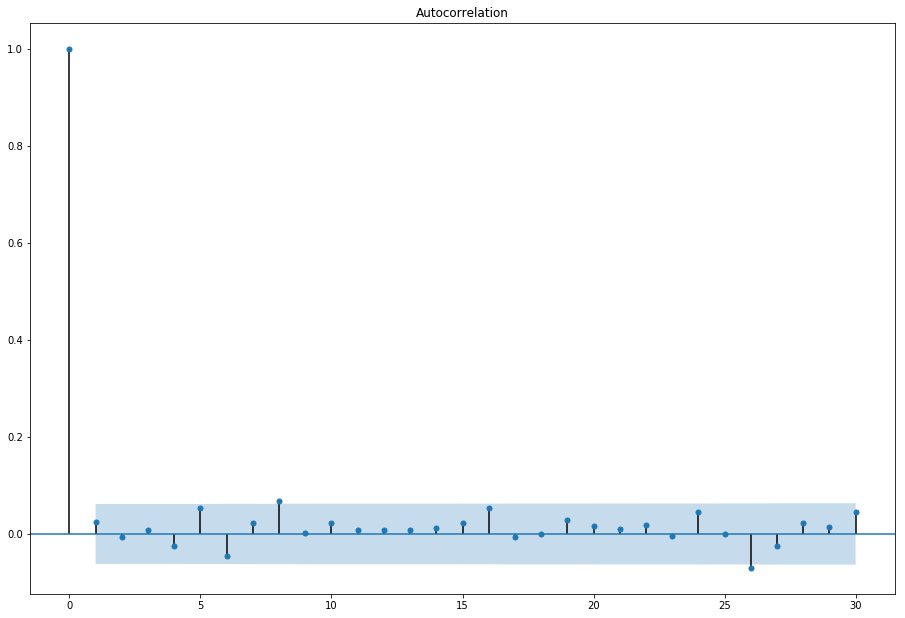

In [9]:
# # plot autocorrelation of daily log return of TSLA
fig=plot_acf(TSLA_logreturn,lags=30)
fig.set_size_inches(15.5,10.5,forward=True)

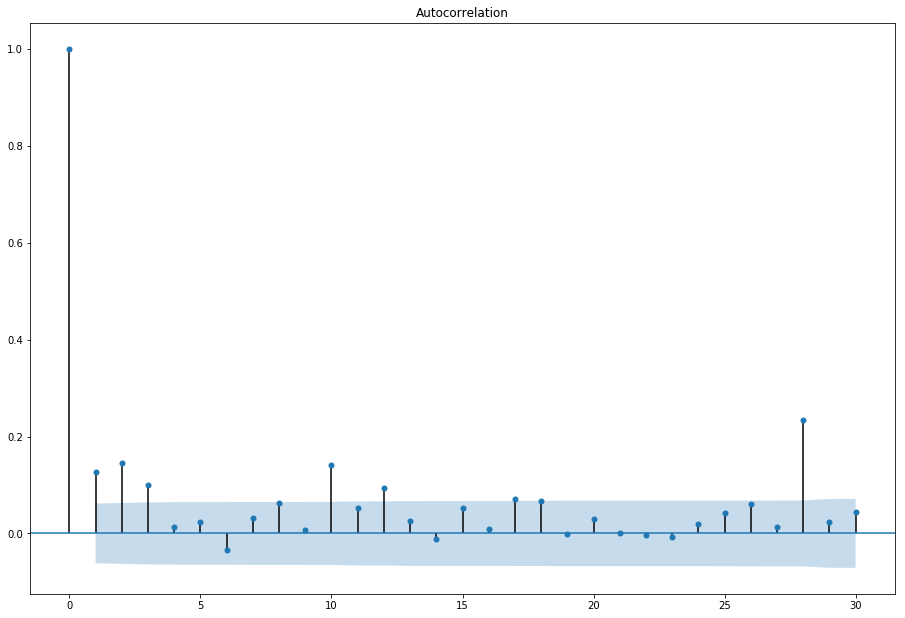

In [10]:
# plot autocorrelation of square daily log return of TSLA
figs=plot_acf(TSLA_Slogreturn,lags=30)
figs.set_size_inches(15.5,10.5,forward=True)

<font color=red>##### 2B) Plot the exchange rate for USD versus another currency of your choice. Interpret your results in terms of behavior.</font>

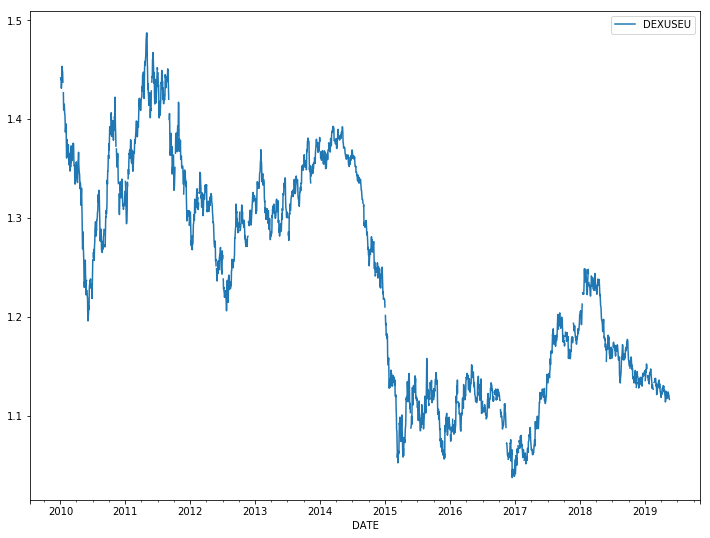

In [11]:
# gain U.S/Euro data from FRED
euro=web.DataReader('DEXUSEU','fred')
euro.plot(figsize=(12,9))

<font color=red>##### 2C) Test for the possible existence of an underlying AR(1) – Markov process in your exchange rate currency pair. To this end, plot the ACF and the partial ACF (PACF). Interpret your results.  Clearly refer to the lags, and their impacts in determining the order.</font>

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

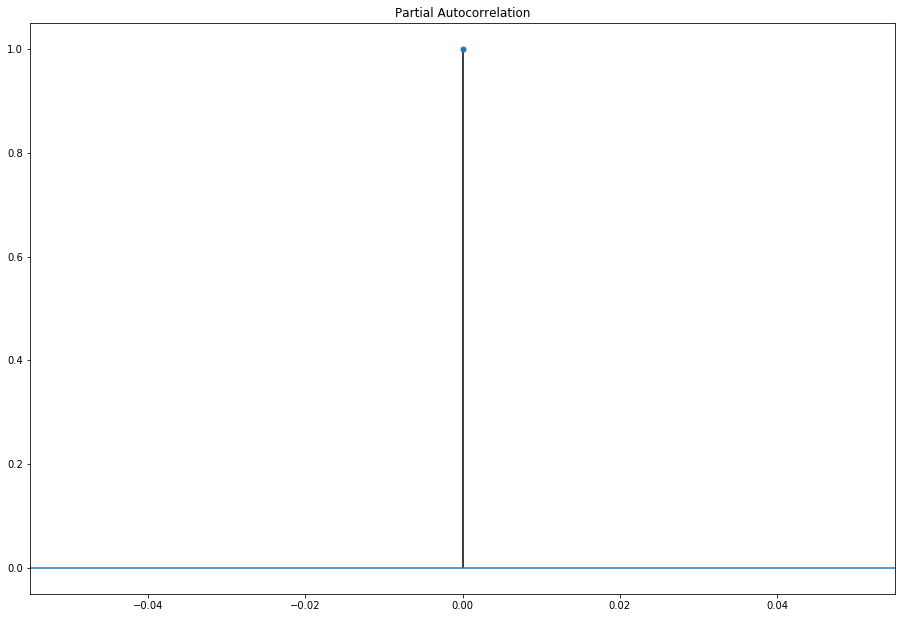

In [13]:
# plot partial autocorrelation of exchange rate of currency
fig_3=plot_pacf(euro, lags=15)
fig_3.set_size_inches(15.5,10.5,forward=True)

### Task 3: Granger Causality Test

To conduct this test the package `statsmodels` will be required, as already done in the code chunk below.

<font color=red>##### 3A) Include below the code chunk to solve for 3.5.7 R Lab/p. 106.  Write your conclusions.</font>

In [15]:
import sys
!{sys.executable} -m pip install statsmodels

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
from statsmodels.tsa.stattools import grangercausalitytests

In [18]:
USMoney=pd.read_excel("/Users/hangxigudeaoqi/Desktop/USMoney.xlsx")
USMoney.head()

,gnp,m1,deflator
1,267.6,110.20,56.04
2,277.1,111.75,56.21
3,294.8,112.95,56.41
4,306.3,113.93,56.67
5,320.4,115.08,56.77


In [19]:
a=USMoney['gnp']
b=USMoney['m1']
x=np.column_stack((a,b))

In [20]:
grangercausalitytests(x,maxlag=15,addconst=True,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.6091 , p=0.0005  , df_denom=132, df_num=1
ssr based chi2 test:   chi2=12.8957 , p=0.0003  , df=1
likelihood ratio test: chi2=12.3164 , p=0.0004  , df=1
parameter F test:         F=12.6091 , p=0.0005  , df_denom=132, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.3405  , p=0.0024  , df_denom=129, df_num=2
ssr based chi2 test:   chi2=13.1725 , p=0.0014  , df=2
likelihood ratio test: chi2=12.5646 , p=0.0019  , df=2
parameter F test:         F=6.3405  , p=0.0024  , df_denom=129, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.0479  , p=0.0007  , df_denom=126, df_num=3
ssr based chi2 test:   chi2=19.1517 , p=0.0003  , df=3
likelihood ratio test: chi2=17.8924 , p=0.0005  , df=3
parameter F test:         F=6.0479  , p=0.0007  , df_denom=126, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.2756  , p=0.0028  

{1: ({'ssr_ftest': (12.609132439179923, 0.0005327160158820625, 132.0, 1),
   'ssr_chi2test': (12.895703630979467, 0.00032933726023545707, 1),
   'lrtest': (12.316393130604183, 0.0004489974724748259, 1),
   'params_ftest': (12.60913243917913, 0.000532716015882273, 132.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (6.340480387644815, 0.002362898133990528, 129.0, 2),
   'ssr_chi2test': (13.172470882858995, 0.0013792223661510295, 2),
   'lrtest': (12.564559632915689, 0.001869134449576763, 2),
   'params_ftest': (6.340480387644861, 0.002362898133990435, 129.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (6.047907198242153, 0.000701096033423105, 126.0, 3),
   'ssr_chi2test': (19.15170612776682, 0.0002543451919257448, 3),
   'lrtest': (17.892351881790773, 0.0004629163967953942, 3),
   'params_ftest': (6.047907198242218, 0.0007010960334230452, 126.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.

In [21]:
# b is m1, a is gnp
y=np.column_stack((b,a))

In [22]:
grangercausalitytests(y,maxlag=15,addconst=True,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2006  , p=0.2752  , df_denom=132, df_num=1
ssr based chi2 test:   chi2=1.2279  , p=0.2678  , df=1
likelihood ratio test: chi2=1.2224  , p=0.2689  , df=1
parameter F test:         F=1.2006  , p=0.2752  , df_denom=132, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3275  , p=0.0390  , df_denom=129, df_num=2
ssr based chi2 test:   chi2=6.9129  , p=0.0315  , df=2
likelihood ratio test: chi2=6.7405  , p=0.0344  , df=2
parameter F test:         F=3.3275  , p=0.0390  , df_denom=129, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7340  , p=0.0465  , df_denom=126, df_num=3
ssr based chi2 test:   chi2=8.6577  , p=0.0342  , df=3
likelihood ratio test: chi2=8.3875  , p=0.0386  , df=3
parameter F test:         F=2.7340  , p=0.0465  , df_denom=126, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7447  , p=0.0065  

{1: ({'ssr_ftest': (1.2006447176406863, 0.2751880242015975, 132.0, 1),
   'ssr_chi2test': (1.2279320975870656, 0.2678095730876781, 1),
   'lrtest': (1.2223812236488811, 0.2688938416717054, 1),
   'params_ftest': (1.200644717640622, 0.2751880242016178, 132.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.3274815220329206, 0.03898831599540014, 129.0, 2),
   'ssr_chi2test': (6.9129073480994006, 0.0315414200699265, 2),
   'lrtest': (6.740497641215484, 0.03438108155748096, 2),
   'params_ftest': (3.32748152203268, 0.03898831599540917, 129.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.7339975224196524, 0.046482195041525495, 126.0, 3),
   'ssr_chi2test': (8.657658820995566, 0.0342063900071952, 3),
   'lrtest': (8.387533974257508, 0.03864605618977901, 3),
   'params_ftest': (2.733997522419964, 0.04648219504150763, 126.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

<font color='red'>The Null hypothesis for grangercausality is that time series in the second column doesn't granger cause the time series in the first column. Granger causality means that past values of the second column have a statistically significant effect on the current value of the first column, taking past values of the first column into account as regressors. We reject the null hypothesis that the second column doesn't granger cause the first column if the p-value are below a desiredd size of the test.

<font color=red>##### 3B) Briefly describe the data in terms of time range and variables. Similar to the linear autoregressive model described in class, write the mathematical regression model solved in each Granger test, including the proper order. Use naming conventions, and notations more reflective of the data set considered for  `USMoney`.

$Y_t=a_0+a_1Y_1+a_2Y_2+a_3Y_3+b_1 X_1+b_2X_2+b_3X_3$
In the first Granger causality test, x is the M1 and y is the GNP. 
When p-value is below 0.5, one rejects null hypothesis that M1 doesn't cause the GNP. In other words, the M1 causes the GNP.
In the second Granger causality test, x is the GNP and y is the M1.
When p-value is abover 0.5, one accpect null hypothesis. It means that the GNP doesn't causes the M1.

### Task 4: Mathematical Proof

<font color=red>##### 4A) Prove the two results in Eq (2.32)/p. 53.  No R-coding is needed here.  Clearly show your steps. Hint: Use the definition of $E(X^n)$ for X-log normally distributed.   Observe also that $Var(X) = E(X^2)-E^2(X)$ for any random variable X.<font/>

The moments of the variable X are
$E(X^n)=e^{nu+1/2n^2\sigma^2}$,n>0
assuming ${R_{t}}$ is log-normally distributed, since $r_{t}=ln(R_{t}+1)$
$e^{r}=R+1$, then $R=e^{r}-1$,in $E(X^n)=e^{nu+1/2n^2\sigma^2}$

when n=1: $E(R)=u_R=e^{u_r+\sigma^2_r/2}-1$

when n=2,input in formula , the result $E(x^2)=E(R^2)-E^2(R)=e^{2u_r+2\sigma^2_r}-(e^{u_r+\sigma^2_r/2})^2=e^{2u_r+\sigma^2_r}(e^{\sigma^2_r}-1)$
